In [2]:
!pip install numpy

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('2001-2017-financial-analysis-1.csv')

In [4]:
# Basic info about the dataset
df.info()

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EL_CYCLE    1337 non-null   object 
 1   FROM_STMT   1337 non-null   int64  
 2   TO_STMT     1337 non-null   int64  
 3   OFFICE      1337 non-null   int64  
 4   CAND_NAME   1337 non-null   object 
 5   CAND_ID     1337 non-null   object 
 6   BORO_DIST   1337 non-null   object 
 7   TERMND      1337 non-null   bool   
 8   CNTRS_NO    1337 non-null   int64  
 9   CNTNS_NO    1337 non-null   int64  
 10  NET_CNTNS   1337 non-null   float64
 11  MATCH_AMT   1337 non-null   int64  
 12  I_NO        1337 non-null   int64  
 13  I_CNTNS_NO  1337 non-null   int64  
 14  I_AMT       1337 non-null   float64
 15  SML_NO      1337 non-null   int64  
 16  SML_AMT     1337 non-null   float64
 17  PUBFND_PMT  1337 non-null   int64  
 18  NET_EXPND   1337 non-null   float64
 19  CAND_CLASS  1337 non-null  

,EL_CYCLE,FROM_STMT,TO_STMT,OFFICE,CAND_NAME,CAND_ID,BORO_DIST,TERMND,CNTRS_NO,CNTNS_NO,...,I_AMT,SML_NO,SML_AMT,PUBFND_PMT,NET_EXPND,CAND_CLASS,MAX_NO,MAX_AMT,LIMIT,NAME_1
0,2001,1,15,1,"Badillo, Herman (ID:81-P)",81,(),False,2035,2191,...,40.0,1638,95584.0,356723,659919.0,P,39,177000.0,4500,241163.0
1,2001,1,15,1,"Cohen, Mitchel (ID:JH-P) *",JH,(),True,0,0,...,0.0,0,0.0,0,0.0,P,0,0.0,4500,0.0
2,2001,1,15,1,"Ferrer, Fernando (ID:AY-P)",AY,(),False,6562,8298,...,1541664.0,3508,590726.0,2871933,8719800.0,P,369,1935646.0,4500,0.0
3,2001,1,15,1,"Fulani, Lenora (ID:FR-P) *",FR,(),True,0,0,...,0.0,0,0.0,0,0.0,P,0,0.0,4500,0.0
4,2001,1,15,1,"Golding, Kenneth (ID:562-P)",562,(),False,0,0,...,0.0,0,0.0,0,13536.0,P,0,0.0,4500,0.0


In [5]:
# Example: Describe NET_EXPND statistics
df['NET_EXPND'].describe()


count    1.337000e+03
mean     3.234789e+05
std      3.834464e+06
min     -1.200000e+03
25%      5.450000e+02
50%      3.268200e+04
75%      1.388100e+05
max      1.083717e+08
Name: NET_EXPND, dtype: float64

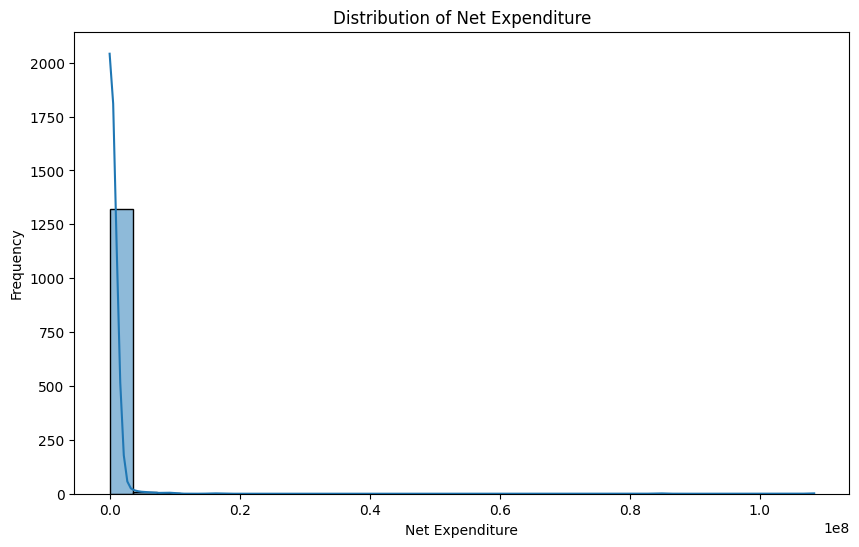

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['NET_EXPND'], kde=True, bins=30)
plt.title('Distribution of Net Expenditure')
plt.xlabel('Net Expenditure')
plt.ylabel('Frequency')
plt.show()


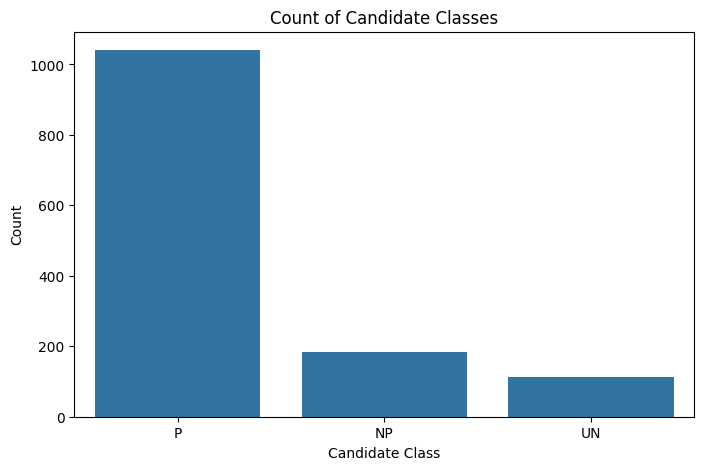

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='CAND_CLASS', data=df)
plt.title('Count of Candidate Classes')
plt.xlabel('Candidate Class')
plt.ylabel('Count')
plt.show()

EL_CYCLE       object
FROM_STMT       int64
TO_STMT         int64
OFFICE          int64
CAND_NAME      object
CAND_ID        object
BORO_DIST      object
TERMND           bool
CNTRS_NO        int64
CNTNS_NO        int64
NET_CNTNS     float64
MATCH_AMT       int64
I_NO            int64
I_CNTNS_NO      int64
I_AMT         float64
SML_NO          int64
SML_AMT       float64
PUBFND_PMT      int64
NET_EXPND     float64
CAND_CLASS     object
MAX_NO          int64
MAX_AMT       float64
LIMIT           int64
NAME_1        float64
dtype: object


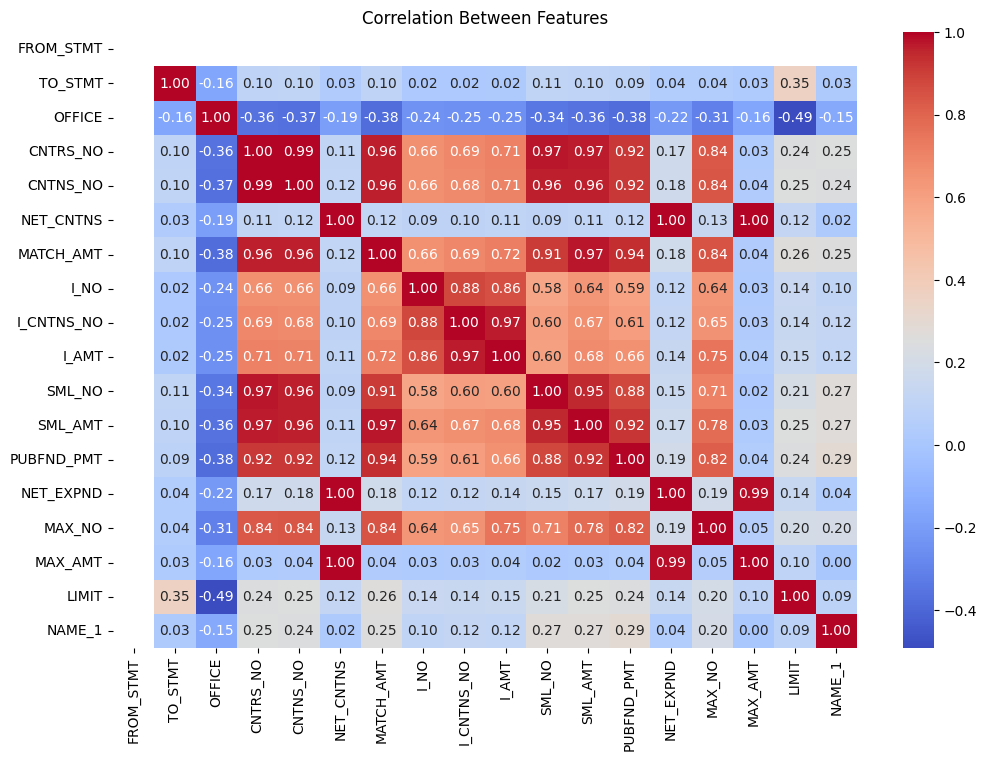

In [12]:
# Check the data types of the DataFrame
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation and plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()


In [14]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in NET_EXPND with the median
df['NET_EXPND'] = df['NET_EXPND'].fillna(df['NET_EXPND'].median())

# Optionally, you can fill other columns similarly
# df['ANOTHER_COLUMN'] = df['ANOTHER_COLUMN'].fillna(df['ANOTHER_COLUMN'].mean())


EL_CYCLE      0
FROM_STMT     0
TO_STMT       0
OFFICE        0
CAND_NAME     0
CAND_ID       0
BORO_DIST     0
TERMND        0
CNTRS_NO      0
CNTNS_NO      0
NET_CNTNS     0
MATCH_AMT     0
I_NO          0
I_CNTNS_NO    0
I_AMT         0
SML_NO        0
SML_AMT       0
PUBFND_PMT    0
NET_EXPND     0
CAND_CLASS    0
MAX_NO        0
MAX_AMT       0
LIMIT         0
NAME_1        0
dtype: int64


In [15]:
df.describe()

,FROM_STMT,TO_STMT,OFFICE,CNTRS_NO,CNTNS_NO,NET_CNTNS,MATCH_AMT,I_NO,I_CNTNS_NO,I_AMT,SML_NO,SML_AMT,PUBFND_PMT,NET_EXPND,MAX_NO,MAX_AMT,LIMIT,NAME_1
count,1337.0,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03,1.337000e+03,1337.000000,1337.000000,1.337000e+03,1337.000000,1337.000000,1.337000e+03,1.337000e+03,1337.000000,1.337000e+03,1337.000000,1337.000000
mean,1.0,13.712790,4.749439,315.411369,393.364248,2.611250e+05,2.485468e+04,1.938669,21.042633,1.124312e+04,243.497382,24049.366784,7.759782e+04,3.234789e+05,7.480180,1.771133e+05,2911.219147,7222.389626
std,0.0,4.205581,0.995898,689.017241,921.313658,3.786199e+06,6.834102e+04,12.439824,173.686828,1.187153e+05,436.816652,52515.875025,2.976667e+05,3.834464e+06,43.323198,3.756498e+06,882.947425,33070.094632
min,1.0,3.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.200000e+03,0.000000,0.000000e+00,1250.000000,0.000000
25%,1.0,15.000000,5.000000,17.000000,21.000000,2.285000e+03,7.500000e+01,0.000000,0.000000,0.000000e+00,14.000000,927.000000,0.000000e+00,5.450000e+02,0.000000,0.000000e+00,2500.000000,0.000000
50%,1.0,15.000000,5.000000,183.000000,199.000000,2.163000e+04,9.986000e+03,0.000000,0.000000,0.000000e+00,157.000000,12210.000000,0.000000e+00,3.268200e+04,0.000000,0.000000e+00,2750.000000,0.000000
75%,1.0,16.000000,5.000000,352.000000,416.000000,7.092200e+04,2.393600e+04,0.000000,0.000000,0.000000e+00,294.000000,27345.000000,7.535000e+04,1.388100e+05,3.000000,1.100000e+04,2750.000000,3319.890000
max,1.0,17.000000,6.000000,9594.000000,13536.000000,1.083750e+08,1.028322e+06,270.000000,4920.000000,3.211188e+06,5988.000000,623833.000000,4.534230e+06,1.083717e+08,1068.000000,1.083750e+08,4950.000000,846449.620000
